# Emprikus pénzügyek - 3. Házi feladat


Sztáray Bence - R6G8K2
Sándor Barbara - IL2037

In [1]:
import nodes_and_edges as nd, graph_manipulation as gm, prediction as pr, data_visualization as dv

In [2]:
nodes, edges = nd.load_and_select_profiles_and_edges()

loading profiles
loading edges
1    2642113
2    1992414
Name: source, dtype: int64
Selected profiles: 695406
Nodes with edges: 434590


In [3]:
results=pr.predict_gender(nodes,edges)
results

C:\Users\Admin\Empirikus\Empi_HF_3\prediction.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_w_genders_test["gender_pair"]=edges_w_genders_test["gender_pair"].replace({0.0: "woman", 1.0: "man"})


,ID,woman,man,results
0,80,2,13,man
1,140,10,6,woman
2,207,15,8,woman
3,225,15,18,man
4,229,17,14,woman
...,...,...,...,...
39995,1632269,0,1,man
39996,1632571,1,0,woman
39997,1632635,0,1,man
39998,1632779,1,0,woman


In [4]:
nodes, edges = nd.load_and_select_profiles_and_edges_full() #Nem csinál teszt adatbázist, így az ábrák a teljes gráfra vonatkoznak majd
G=gm.create_graph_from_nodes_and_edges(nodes, edges)

loading profiles
loading edges
1    2642113
2    1992414
Name: source, dtype: int64
Selected profiles: 695406
Nodes with edges: 434590


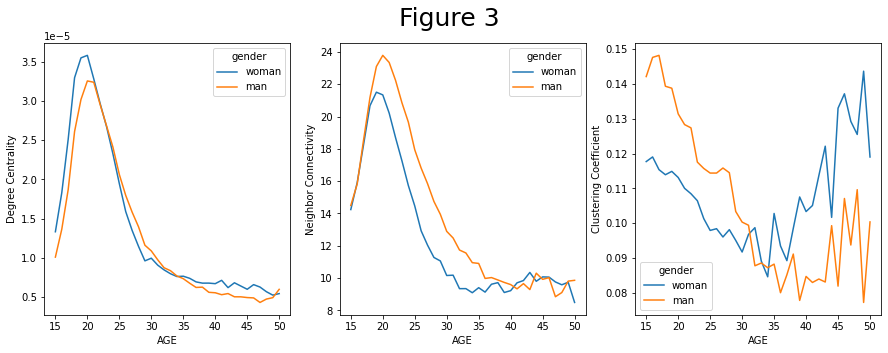

In [5]:
dv.figure3(nodes,G)

A baloldali ábrán az átlagos fokszámok látszanak, nemenkénti, és kor szerinti bontásban (minden fokszám le van osztva a maximális fokszámmal, (n-1)-el, ahol n a csúcsok száma). Azt látjuk, rajta, hogy a férfiak és a nők között nincs jelentős különbség, mindkét esetben a 20-as évek esetén van a legtöbb kapcsolatuk. Az is látszik, hogy az idős embereknek van a legkevesebb szomszédjuk. Mivel egy online közösségi platformról van szó, ez kissé torzíthatja a képet, mivel az idősek ezeket jóval kevésbé használják, mint a fiatalok. Ez hasonló a cikk eredményeihez, de talán pont a platform jellege miatt még nagyobbak a különbségek a korok között.

A középső ábra a csúcsok szomszédjainak átlagos fokszámát mutatja meg, és hasonló a trend, mint az előzőn, azaz időskorban az emberek ismerősi is kevesebb embert ismernek, azaz itt nagyobb a társadalmi elszigeteltség. Ez a mutató is a 20-as években maximális.

A harmadik ábra a klaszterezettséget mutatja a társadalmon belül. Ez érdekes módon a legfiatalabb korosztályban mutatkozik a legnagyobbnak, azaz itt a legnagyobb a valószínűsége annak, hogy ha az adott személy ismer 2 embert, akkor az a 2 is ismerni fogja egymást. Itt viszonylag nagy a különbség a nők és a férfiak között, fiatalkorban a férfiak között nagyobb a klaszterezettség, míg idős korban a nőknél. Ez az eredmény eltér a cikktől, mivel ott a fiatal korban a legalacsonyabb ez a szám. Ez is összefüggésben lehet a platform jellegével, mivel a közösségi oldalakon a fiatalok inkább követik egymást, mint amennyit telefonálnak, így súrúbb hálózat alakul ki fiatal korban.

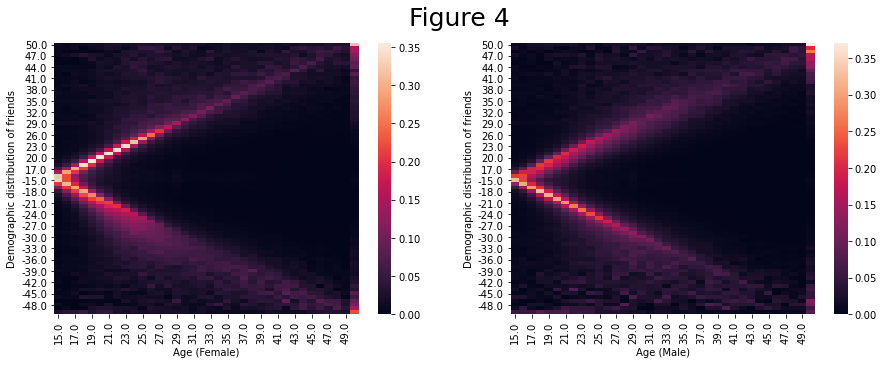

In [6]:
edges_w_features=gm.add_node_features_to_edges(nodes, edges)
dv.figure4(edges_w_features)

Ezeken az ábrákon az látszik, hogy adott korú nők illetve férfiak, milyen gyakorisággal ismernek adott korú nőket, vagy férfiakat. A negatív oldal jelenti mindkét oldalon a férfiakat. A két ábra között- a cikkel ellentétben- nincs túl nagy különbség mindkét esetben az azonos korú emberekkel vannak leginkább ismerettségben. Az se látszik olyan egyértelműen, hogy az azonos nemű kapcsolatok gyakoriabbak, mint az ellenkező neműek. Ez megint a platform sajátossága lehet, hogy online az emberek arányaiban sokkal inkább követnek ellenkező neműeket, mint ahányszor telefonálnak velük. A szűlő-gyerek viszony se nagyon látszik ezen az ábrán, mivel online ez a kapcsolat kevésbé mutakozik meg, mint a telefonhívásokban (itt csak egy ismerős a sok közül).

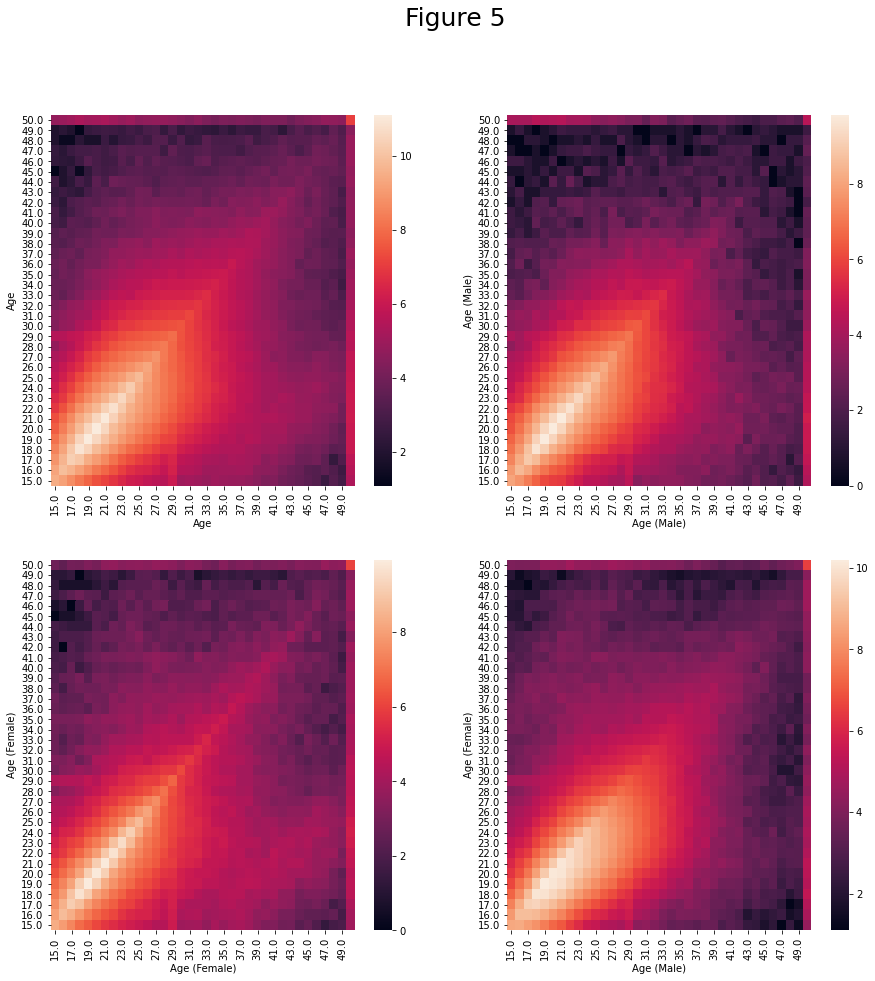

In [7]:
edges_w_features=gm.add_node_features_to_edges(nodes, edges)
dv.figure5(edges_w_features)

Ezen a négy ábrán is azt láthatjuk, hogy a nemek szerinti párok gyakorisága hogy alakul különböző életkorokban. (A gyakoriságok logaritmikus skálán vannak ábrázolva). Ezek az ábrák mind a 4 esetben hasonlóak nagyjából, mindenhol az látszik, hogy az azonos korú emberek között van a legtöbb kapcsolat. A szülő-gyerek viszony itt se jelenik meg olyan erősen, mint a cikkben, talán a nő-nő kapcsolatban a leginkább látható. Egy dolog amit ki lehet itt emelni, hogy a jobb alsó ábrán a középső folt kicsit jobbra elnyúlik. Ez azt jelenti, hogy a férfiak esetében jellemzőbb, hogy fiatalabb nőkkel vannak párban, mint az összes többi esetben. Itt is látszik, hogy időskorban csökken a kapcsolatok száma, mivel ottt jóval sötétebbek az ábrák.